<a href="https://colab.research.google.com/github/abdy22/mask_detection_CNN/blob/master/Convolutional_Neural_Network_To_Detect_Masked_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
image_size=(200,200)
train_path='/content/drive/My Drive/CNN/training'
Validation_path='/content/drive/My Drive/CNN/validation'



In [5]:
train_dataset=train.flow_from_directory(train_path,
                                        target_size=image_size,
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=train.flow_from_directory(Validation_path,
                                        target_size=image_size,
                                        batch_size=3,
                                        class_mode='binary')

Found 38 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'mask': 0, 'unmasked': 1}

In [7]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')


                                                   ])

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [9]:
result=model.fit(train_dataset,
                 steps_per_epoch=10,
                 epochs=20,
                 validation_data=validation_dataset)

Epoch 1/20
10/10 [==============================] - 18s 2s/step - loss: 5.6390 - accuracy: 0.4828 - val_loss: 0.8034 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 5s 460ms/step - loss: 0.7648 - accuracy: 0.5172 - val_loss: 0.6378 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 5s 452ms/step - loss: 0.6331 - accuracy: 0.6897 - val_loss: 0.7860 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 5s 451ms/step - loss: 0.4848 - accuracy: 0.7931 - val_loss: 0.6768 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 5s 452ms/step - loss: 0.2552 - accuracy: 0.9655 - val_loss: 0.9197 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 5s 456ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.9015 - val_accuracy: 0.5714
Epoch 7/20
10/10 [==============================] - 5s 454ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.9034 - val_accuracy: 0.5714
Epoch 8/

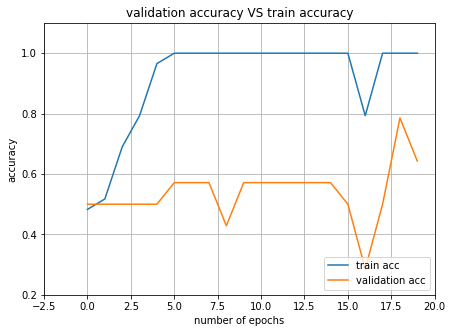

In [11]:
#visualizing training and validation accuracy 
train_acc=result.history['accuracy']
validation_acc=result.history['val_accuracy']
plt.figure(1,figsize=(7,5))
rnge=range(20) #number of epochs
plt.plot(rnge,train_acc)
plt.plot(rnge,validation_acc)
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('validation accuracy VS train accuracy')
plt.grid(True)
plt.legend(['train acc','validation acc'],loc=4)
plt.style.use(['classic'])


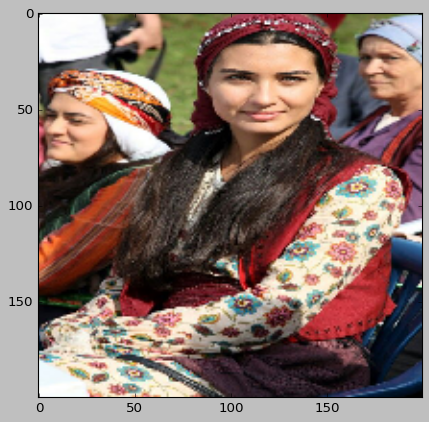

not masked


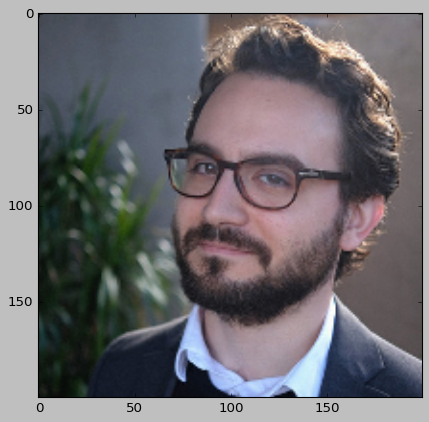

not masked


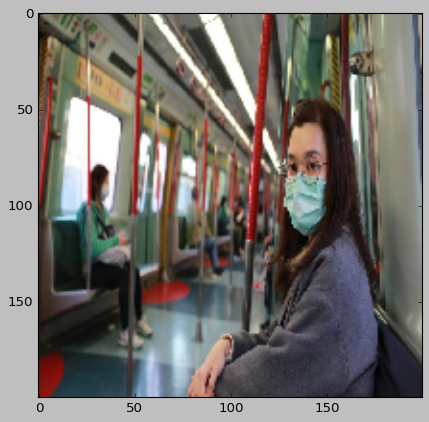

masked


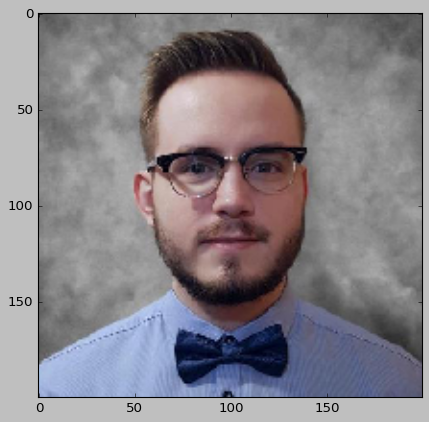

not masked


In [12]:
from tensorflow.keras.preprocessing import image
test_path='/content/drive/My Drive/test'
for pic in os.listdir(test_path):
  img=image.load_img(test_path+"/"+pic,target_size=(200,200,3))
  plt.imshow(img)
  plt.show()
  x=image.array_to_img(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  prediction=model.predict(images)
  if (prediction==0):
    print('masked')
  else:
    print('not masked')

